The correlation between oil price per barrel and average retail gasoline prices in the USA

With data from the first week of 2012 until last week of August 2022

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



In [2]:
# 1st dataset
oil_df = pd.read_csv('./weekly_prices_edited.csv')
oil_df.head()


,Date,Price FOB Dollars per Barrel
0,08/26/2022,94.47
1,08/19/2022,91.81
2,08/12/2022,94.65
3,08/5/2022,94.01
4,07/29/2022,99.60


In [3]:
#check for any missing data in any columns

for col in oil_df.columns:
    missing = np.mean(oil_df[col].isnull())
    print('{} - {}%'.format(col, missing))


Date - 0.0%
Price FOB Dollars per Barrel - 0.0%


In [4]:
oil_df.dtypes

Date                             object
Price FOB Dollars per Barrel    float64
dtype: object

In [5]:
gas_df = pd.read_csv('./gas_prices_edited.csv')
gas_df.head()

,Date,Retail Gasoline Prices Dollars per Gallon
0,08/29/2022,3.827
1,08/22/2022,3.880
2,08/15/2022,3.938
3,08/8/2022,4.038
4,08/1/2022,4.192


In [6]:
gas_df.dtypes

Date                                          object
Retail Gasoline Prices Dollars per Gallon    float64
dtype: object

In [7]:
oil_df.insert(0, 'id', range(len(oil_df)))
oil_df.head()

,id,Date,Price FOB Dollars per Barrel
0,0,08/26/2022,94.47
1,1,08/19/2022,91.81
2,2,08/12/2022,94.65
3,3,08/5/2022,94.01
4,4,07/29/2022,99.60


In [ ]:
gas_df.insert(0, 'id', range(len(oil_df)))
gas_df.head()

I created an additional column named 'id' for both dataframes, so that they can be merged into a single dataframe using outer join

In [20]:
combined_df = pd.merge(oil_df, gas_df, how = 'outer', on ='id')
combined_df.head()


,id,Date_x,Price FOB Dollars per Barrel,Date_y,Retail Gasoline Prices Dollars per Gallon
0,0,08/26/2022,94.47,08/29/2022,3.827
1,1,08/19/2022,91.81,08/22/2022,3.880
2,2,08/12/2022,94.65,08/15/2022,3.938
3,3,08/5/2022,94.01,08/8/2022,4.038
4,4,07/29/2022,99.60,08/1/2022,4.192


In [26]:
combined_df = combined_df.rename(columns={"Price FOB Dollars per Barrel": "Oil_price", "Retail Gasoline Prices Dollars per Gallon": "Gas_price"})
combined_df.head()

,id,Date_x,Oil_price,Date_y,Gas_price
0,0,08/26/2022,94.47,08/29/2022,3.827
1,1,08/19/2022,91.81,08/22/2022,3.880
2,2,08/12/2022,94.65,08/15/2022,3.938
3,3,08/5/2022,94.01,08/8/2022,4.038
4,4,07/29/2022,99.60,08/1/2022,4.192


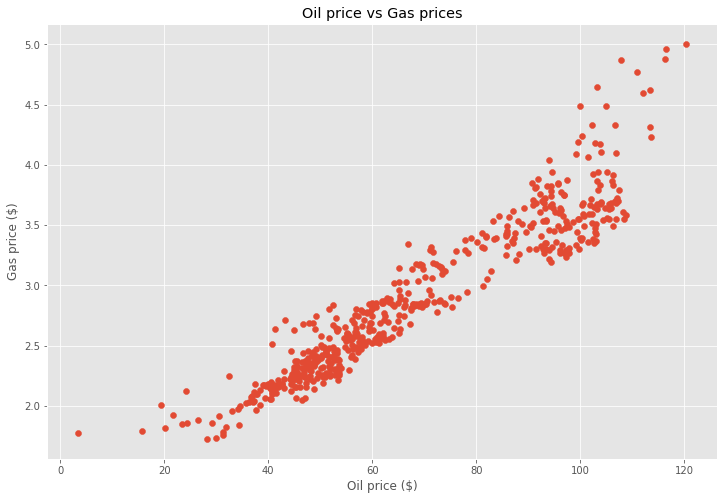

In [39]:
# As we know the dates are already sorted by descending, we can plot using our oil_price and gas_price columns

plt.scatter(x=combined_df['Oil_price'], y=combined_df['Gas_price'])

plt.title('Oil price vs Gas prices')

plt.xlabel('Oil price ($)')
plt.ylabel('Gas price ($)')
plt.show()

<AxesSubplot:xlabel='Oil_price', ylabel='Gas_price'>

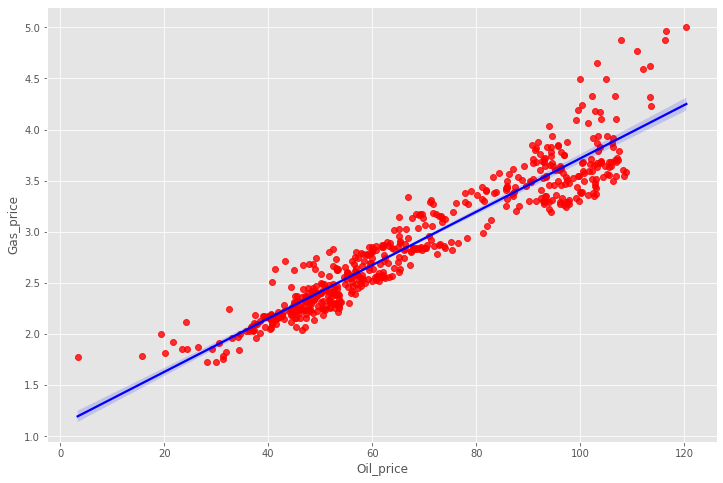

In [37]:
sns.regplot(x='Oil_price', y='Gas_price', data=combined_df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})